In [1]:
# Parameters - Constants
MAX_MSL = 0.4
MAX_TREE_DEPTH = 20
TRAIN_FRACTION = 0.7
RANDOM_SEED = 867201
CV_VALIDATE_SPLIT = 5

In [2]:
# Libraries to import
import re
import numpy as np
import pandas as pd

from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold


import matplotlib
from matplotlib import pyplot as plt

import seaborn as sns

# font set for graphs
font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)


In [3]:
def metric_statistics_decision_tree(dtree,
                                    training_features,
                                    training_class,
                                    test_features,
                                    test_class,
                                    num_cv=5,
                                    num_repeat=5):

    skfold=RepeatedStratifiedKFold(n_splits=num_cv,
                                   n_repeats=num_repeat,
                                   random_state=RANDOM_SEED)
    cv_fold=0
    scores=[]

    collect_vals_predictions = []

    for tr,va in skfold.split(training_features,training_class):
    
        dtree.fit(training_features[tr,:],training_class[tr])
        pred_test_y=dtree.predict(training_features[va,:])
        proba_test_y = dtree.predict_proba(training_features[va,:])

        Accuracy= 100*metrics.accuracy_score(training_class[va],pred_test_y)
        Recall=100*metrics.recall_score(training_class[va],pred_test_y)
        Precision= 100*metrics.precision_score(training_class[va],pred_test_y)
        FPR = 100*(1-metrics.recall_score(training_class[va],pred_test_y,pos_label=0))
        roc_auc = 100*metrics.roc_auc_score(training_class[va],pred_test_y)
        cv_fold = cv_fold+1
        collect_vals_predictions.append({'cv_fold':cv_fold,
                                    'validation':training_class[va].copy(),
                                    'model_prediction':pred_test_y,
                                    'model_probability':proba_test_y})
        scores.append([cv_fold, Accuracy, Recall, Precision, FPR, roc_auc])

    # All the data
    dtree.fit(training_features,training_class)
    pred_test_y=dtree.predict(test_features)
    proba_test_y=dtree.predict_proba(test_features)

    Accuracy= 100*metrics.accuracy_score(test_class,pred_test_y)
    Recall=100*metrics.recall_score(test_class,pred_test_y)
    Precision= 100*metrics.precision_score(test_class,pred_test_y)
    FPR = 100*(1-metrics.recall_score(test_class,pred_test_y,pos_label=0))
    roc_auc = 100*metrics.roc_auc_score(test_class,pred_test_y)
    cv_fold=0
    collect_vals_predictions.append({'cv_fold':cv_fold,
                                     'validation':test_class.copy(),
                                     'model_prediction':pred_test_y,
                                     'model_probability':proba_test_y})

    
    scores.append([cv_fold, Accuracy, Recall, Precision, FPR, roc_auc])
    scores=pd.DataFrame.from_records(scores,columns=['CV_Fold','Accuracy','Recall','Precision','FPR','ROC_AUC'])

    metrics_summary = scores#[['Accuracy','Recall','Precision','FPR','ROC_AUC']]
    return metrics_summary,collect_vals_predictions

In [4]:
# Read Data into raw data
raw_data = pd.read_csv(r"..\..\data\diabetes\diabetes.csv")

In [5]:
classification = 'Outcome'
features = list(raw_data.columns)
features.remove(classification)

In [6]:
# Split into train and test
training_data = raw_data.sample(frac=TRAIN_FRACTION,random_state=RANDOM_SEED)
training_class = training_data.loc[:,classification].values
training_features = training_data.loc[:,features].values


test_data = raw_data.drop(index=training_data.index)
test_class = test_data.loc[:,classification].values
test_features = test_data.loc[:,features].values

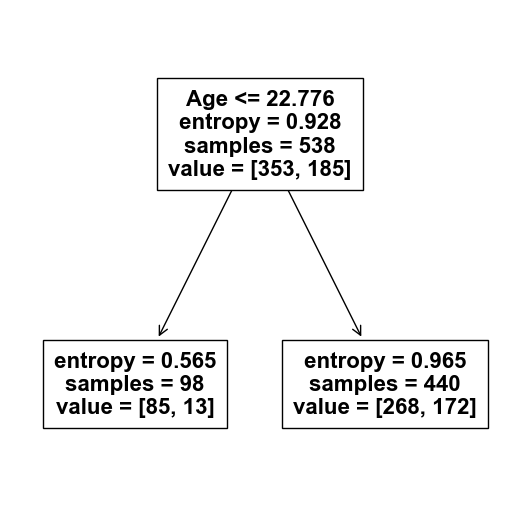

In [7]:
depth = 1
criterion = 'entropy'
splitter = 'random'
entropy_depth1_random_tree =  DecisionTreeClassifier(random_state=RANDOM_SEED,
                                                     criterion=criterion,
                                                     max_depth=depth,
                                                     splitter=splitter)

entropy_depth1_random_tree.fit(training_features,training_class)

fig=plt.figure(figsize=[5,5])
ax=fig.add_axes([0,0,1,1])
txt=tree.plot_tree(entropy_depth1_random_tree,fontsize=8,proportion=False,ax=ax)
ycollect=[]
sign=1
for tx in txt:
    val = tx.get_text()
    num = re.search(r'x\[(\d+)\]',val) 
    if(num is not None): 
        num=int(num.group()[2:-1])
        tx.set_text(tx.get_text().replace(f'x[{num}]',training_data.columns[num]))
    tx.set_fontsize(16)
plt.savefig('Plots/Random_Depth1_Entropy_Metric_tree.svg',format='svg')
plt.show()

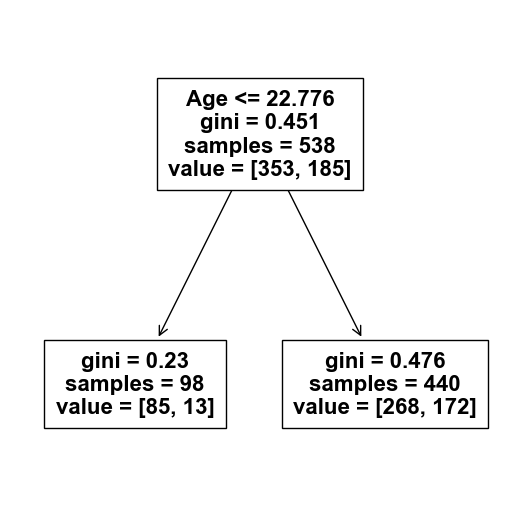

In [8]:
depth = 1
criterion = 'gini'
splitter = 'random'
gini_depth1_random_tree =  DecisionTreeClassifier(random_state=RANDOM_SEED,
                                                     criterion=criterion,
                                                     max_depth=depth,
                                                     splitter=splitter)

gini_depth1_random_tree.fit(training_features,training_class)

fig=plt.figure(figsize=[5,5])
ax=fig.add_axes([0,0,1,1])
txt=tree.plot_tree(gini_depth1_random_tree,fontsize=8,proportion=False,ax=ax)
ycollect=[]
sign=1
for tx in txt:
    val = tx.get_text()
    num = re.search(r'x\[(\d+)\]',val) 
    if(num is not None): 
        num=int(num.group()[2:-1])
        tx.set_text(tx.get_text().replace(f'x[{num}]',training_data.columns[num]))
    tx.set_fontsize(16)
plt.savefig('Plots/Random_Depth1_Gini_Metric_tree.svg',format='svg')
plt.show()

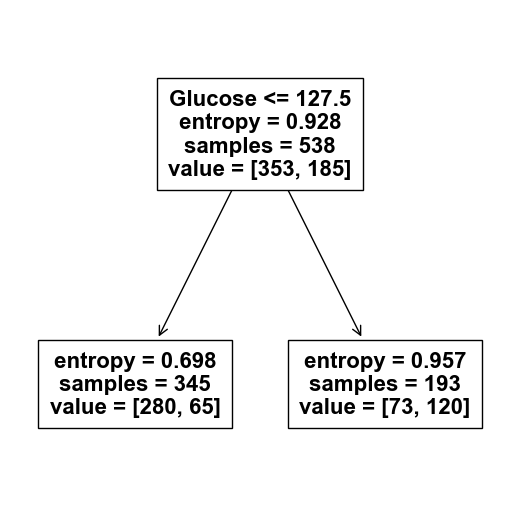

In [9]:
depth = 1
criterion = 'entropy'
splitter = 'best'
entropy_depth1_best_tree =  DecisionTreeClassifier(random_state=RANDOM_SEED,
                                                     criterion=criterion,
                                                     max_depth=depth,
                                                     splitter=splitter)

entropy_depth1_best_tree.fit(training_features,training_class)

fig=plt.figure(figsize=[5,5])
ax=fig.add_axes([0,0,1,1])
txt=tree.plot_tree(entropy_depth1_best_tree,fontsize=8,proportion=False,ax=ax)
ycollect=[]
sign=1
for tx in txt:
    val = tx.get_text()
    num = re.search(r'x\[(\d+)\]',val) 
    if(num is not None): 
        num=int(num.group()[2:-1])
        tx.set_text(tx.get_text().replace(f'x[{num}]',training_data.columns[num]))
    tx.set_fontsize(16)
plt.savefig('Plots/Best_Depth1_Entropy_Metric_tree.svg',format='svg')
plt.show()

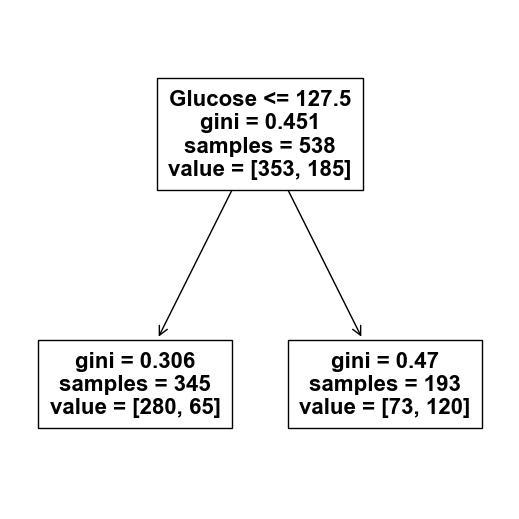

In [10]:
depth = 1
criterion = 'gini'
splitter = 'best'
gini_depth1_best_tree =  DecisionTreeClassifier(random_state=RANDOM_SEED,
                                                     criterion=criterion,
                                                     max_depth=depth,
                                                     splitter=splitter)

gini_depth1_best_tree.fit(training_features,training_class)

fig=plt.figure(figsize=[5,5])
ax=fig.add_axes([0,0,1,1])
txt=tree.plot_tree(gini_depth1_best_tree,fontsize=8,proportion=False,ax=ax)
ycollect=[]
sign=1
for tx in txt:
    val = tx.get_text()
    num = re.search(r'x\[(\d+)\]',val) 
    if(num is not None): 
        num=int(num.group()[2:-1])
        tx.set_text(tx.get_text().replace(f'x[{num}]',training_data.columns[num]))
    tx.set_fontsize(16)
plt.savefig('Plots/Best_Depth1_Gini_Metric_tree.svg',format='svg')
plt.show()

In [11]:
criterion='entropy'
depth = 2
entropy_depth2_tree = DecisionTreeClassifier(random_state=RANDOM_SEED,criterion=criterion,max_depth=depth)
scores,collection_vals = metric_statistics_decision_tree(entropy_depth2_tree,training_features,training_class,test_features,test_class,num_cv=5,num_repeat=5)
scores.to_csv('Results/Performance_Depth2_Entropy_Tree.csv',index=False)
score_summary=scores[['Accuracy','Recall','Precision','FPR','ROC_AUC']].describe().T
score_summary[['mean','std']].T

Accuracy     Recall  Precision        FPR    ROC_AUC
mean  74.524259  48.170228  69.426078  11.626831  68.271699
std    3.303535  11.851639   7.664283   4.996324   4.818301

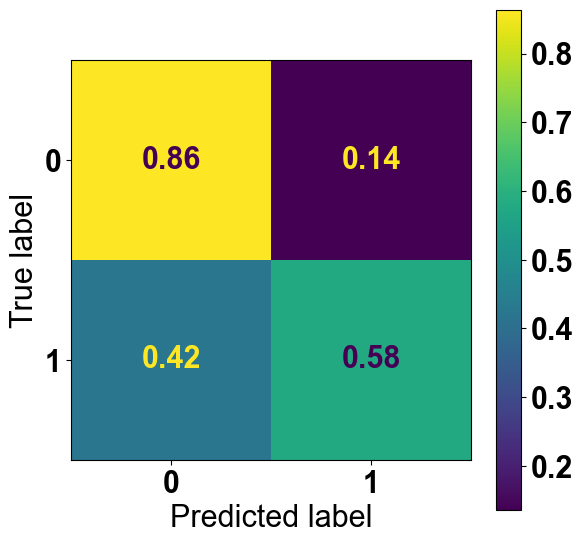

In [12]:
fig=plt.figure(figsize=[5,5])
ax = fig.add_axes([0,0,1,1])
metrics.ConfusionMatrixDisplay.from_predictions(test_class,collection_vals[-1]['model_prediction'],normalize='true',ax=ax)
plt.savefig('Plots/ConfusionMatrix_Depth2_Entropy.svg',format='svg')

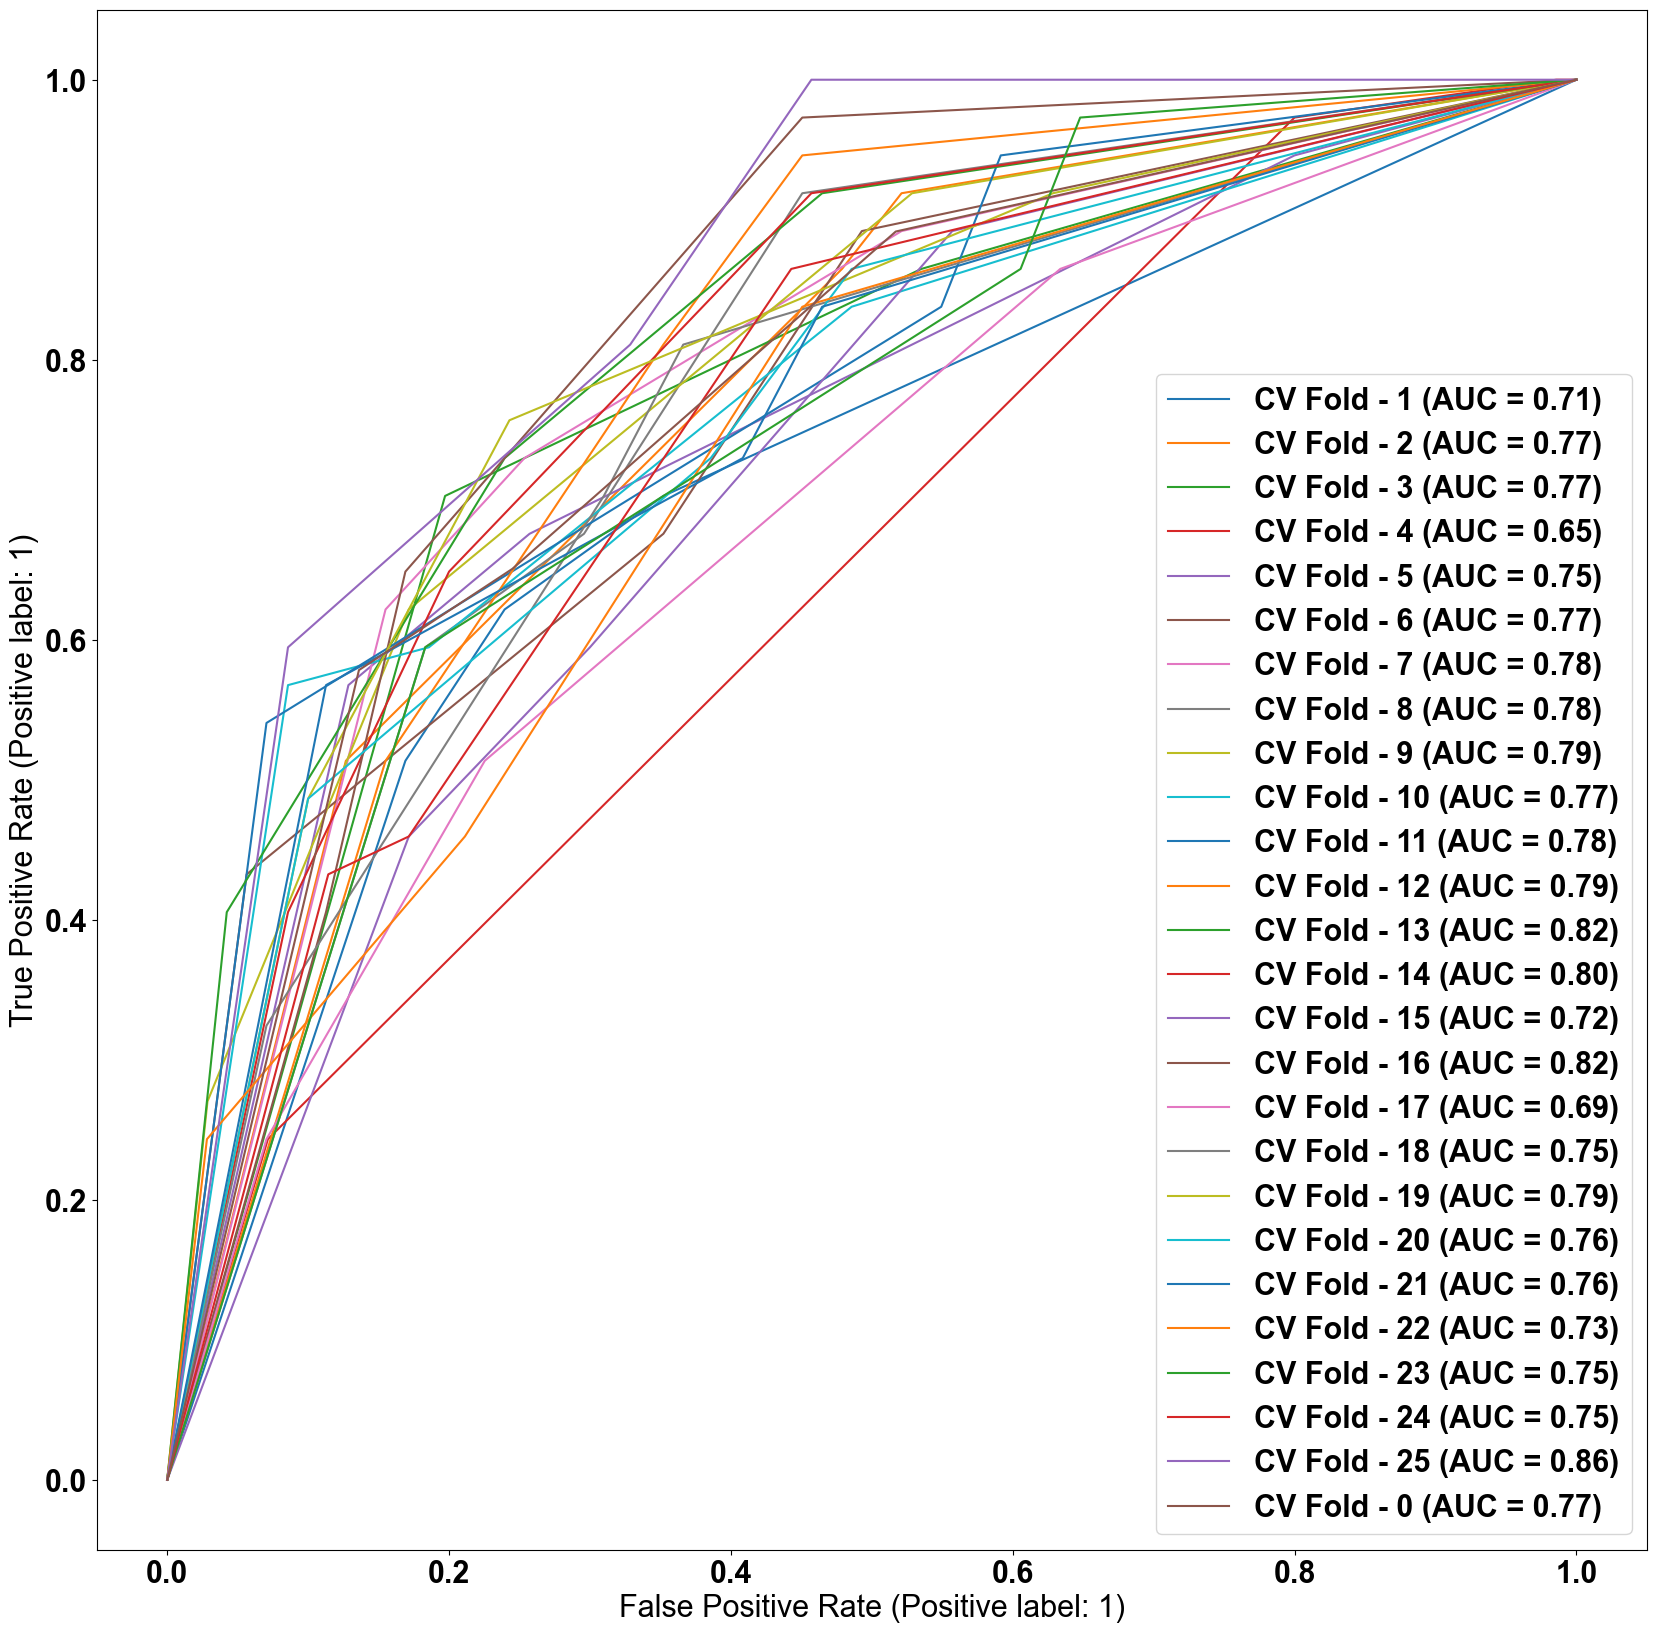

In [13]:
fig,ax=plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(20)
for val in collection_vals:
    label='CV Fold - %d'%(val['cv_fold'])
    rocDisplay = metrics.RocCurveDisplay.from_predictions(val['validation'],
                                                          val['model_probability'][:,1],
                                                          name=label,
                                                          ax=ax)
    
fig.savefig('Plots/ROC_Depth2_Entropy.svg',format='svg')

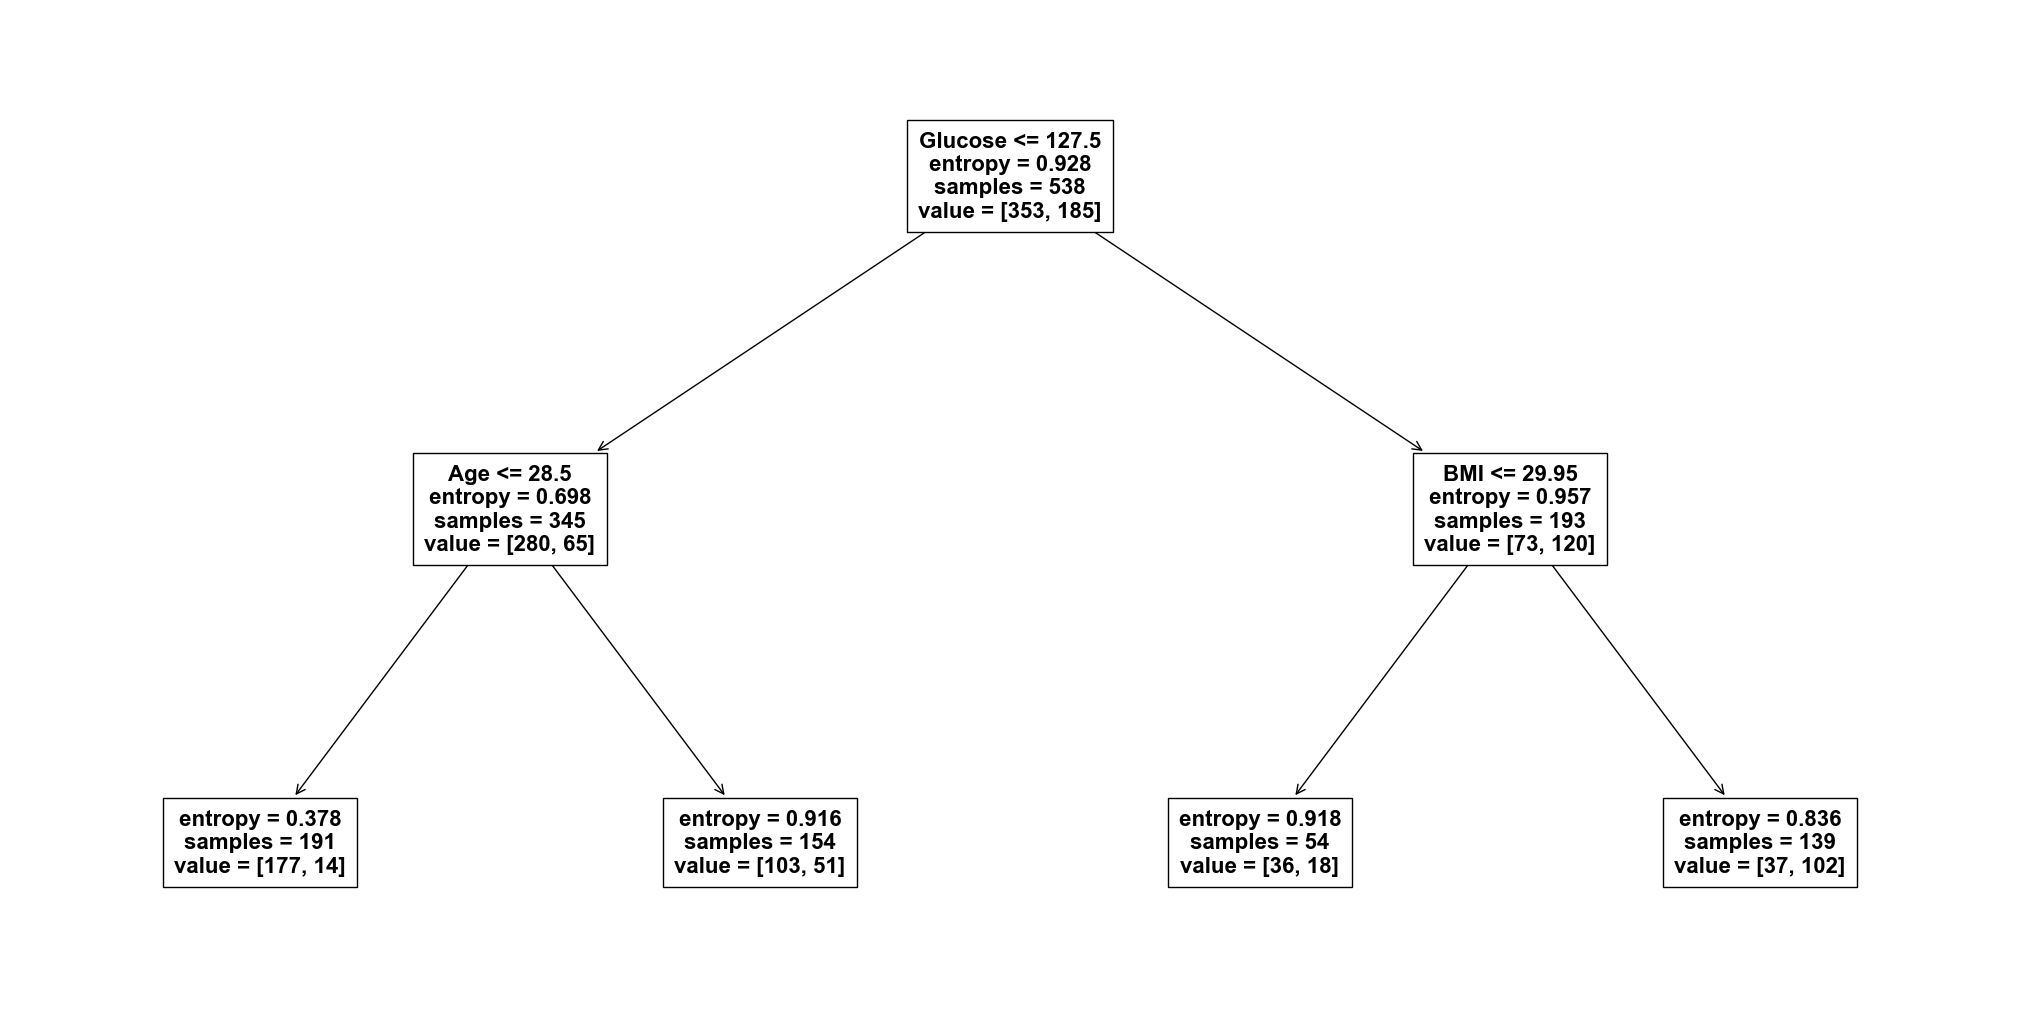

In [14]:
fig=plt.figure(figsize=[20,10])
ax=fig.add_axes([0,0,1,1])
txt=tree.plot_tree(entropy_depth2_tree,fontsize=8,proportion=False,ax=ax)
ycollect=[]
sign=1
for tx in txt:
    val = tx.get_text()
    num = re.search(r'x\[(\d+)\]',val) 
    if(num is not None): 
        num=int(num.group()[2:-1])
        tx.set_text(tx.get_text().replace(f'x[{num}]',training_data.columns[num]))
    tx.set_fontsize(16)
plt.savefig('Plots/Best_Depth2_Entropy_Metric_tree.svg',format='svg')
plt.show()

In [15]:
criterion='entropy'
depth = 4
entropy_depth4_tree = DecisionTreeClassifier(random_state=RANDOM_SEED,criterion=criterion,max_depth=depth)
scores,collection_vals = metric_statistics_decision_tree(entropy_depth4_tree,training_features,training_class,test_features,test_class,num_cv=5,num_repeat=5)
scores.to_csv('Results/Performance_Depth4_Entropy_Tree.csv',index=False)
score_summary=scores[['Accuracy','Recall','Precision','FPR','ROC_AUC']].describe().T
score_summary[['mean','std']].T

Accuracy     Recall  Precision        FPR    ROC_AUC
mean  72.900988  63.187887  61.388724  22.028029  70.579929
std    3.271747  13.995901   6.221406   9.091261   4.052070

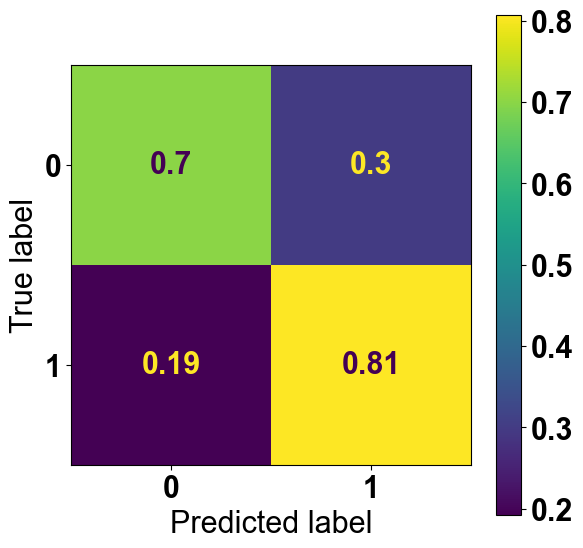

In [16]:
fig=plt.figure(figsize=[5,5])
ax = fig.add_axes([0,0,1,1])
metrics.ConfusionMatrixDisplay.from_predictions(test_class,collection_vals[-1]['model_prediction'],normalize='true',ax=ax)
plt.savefig('Plots/ConfusionMatrix_Depth4_Entropy.svg',format='svg')

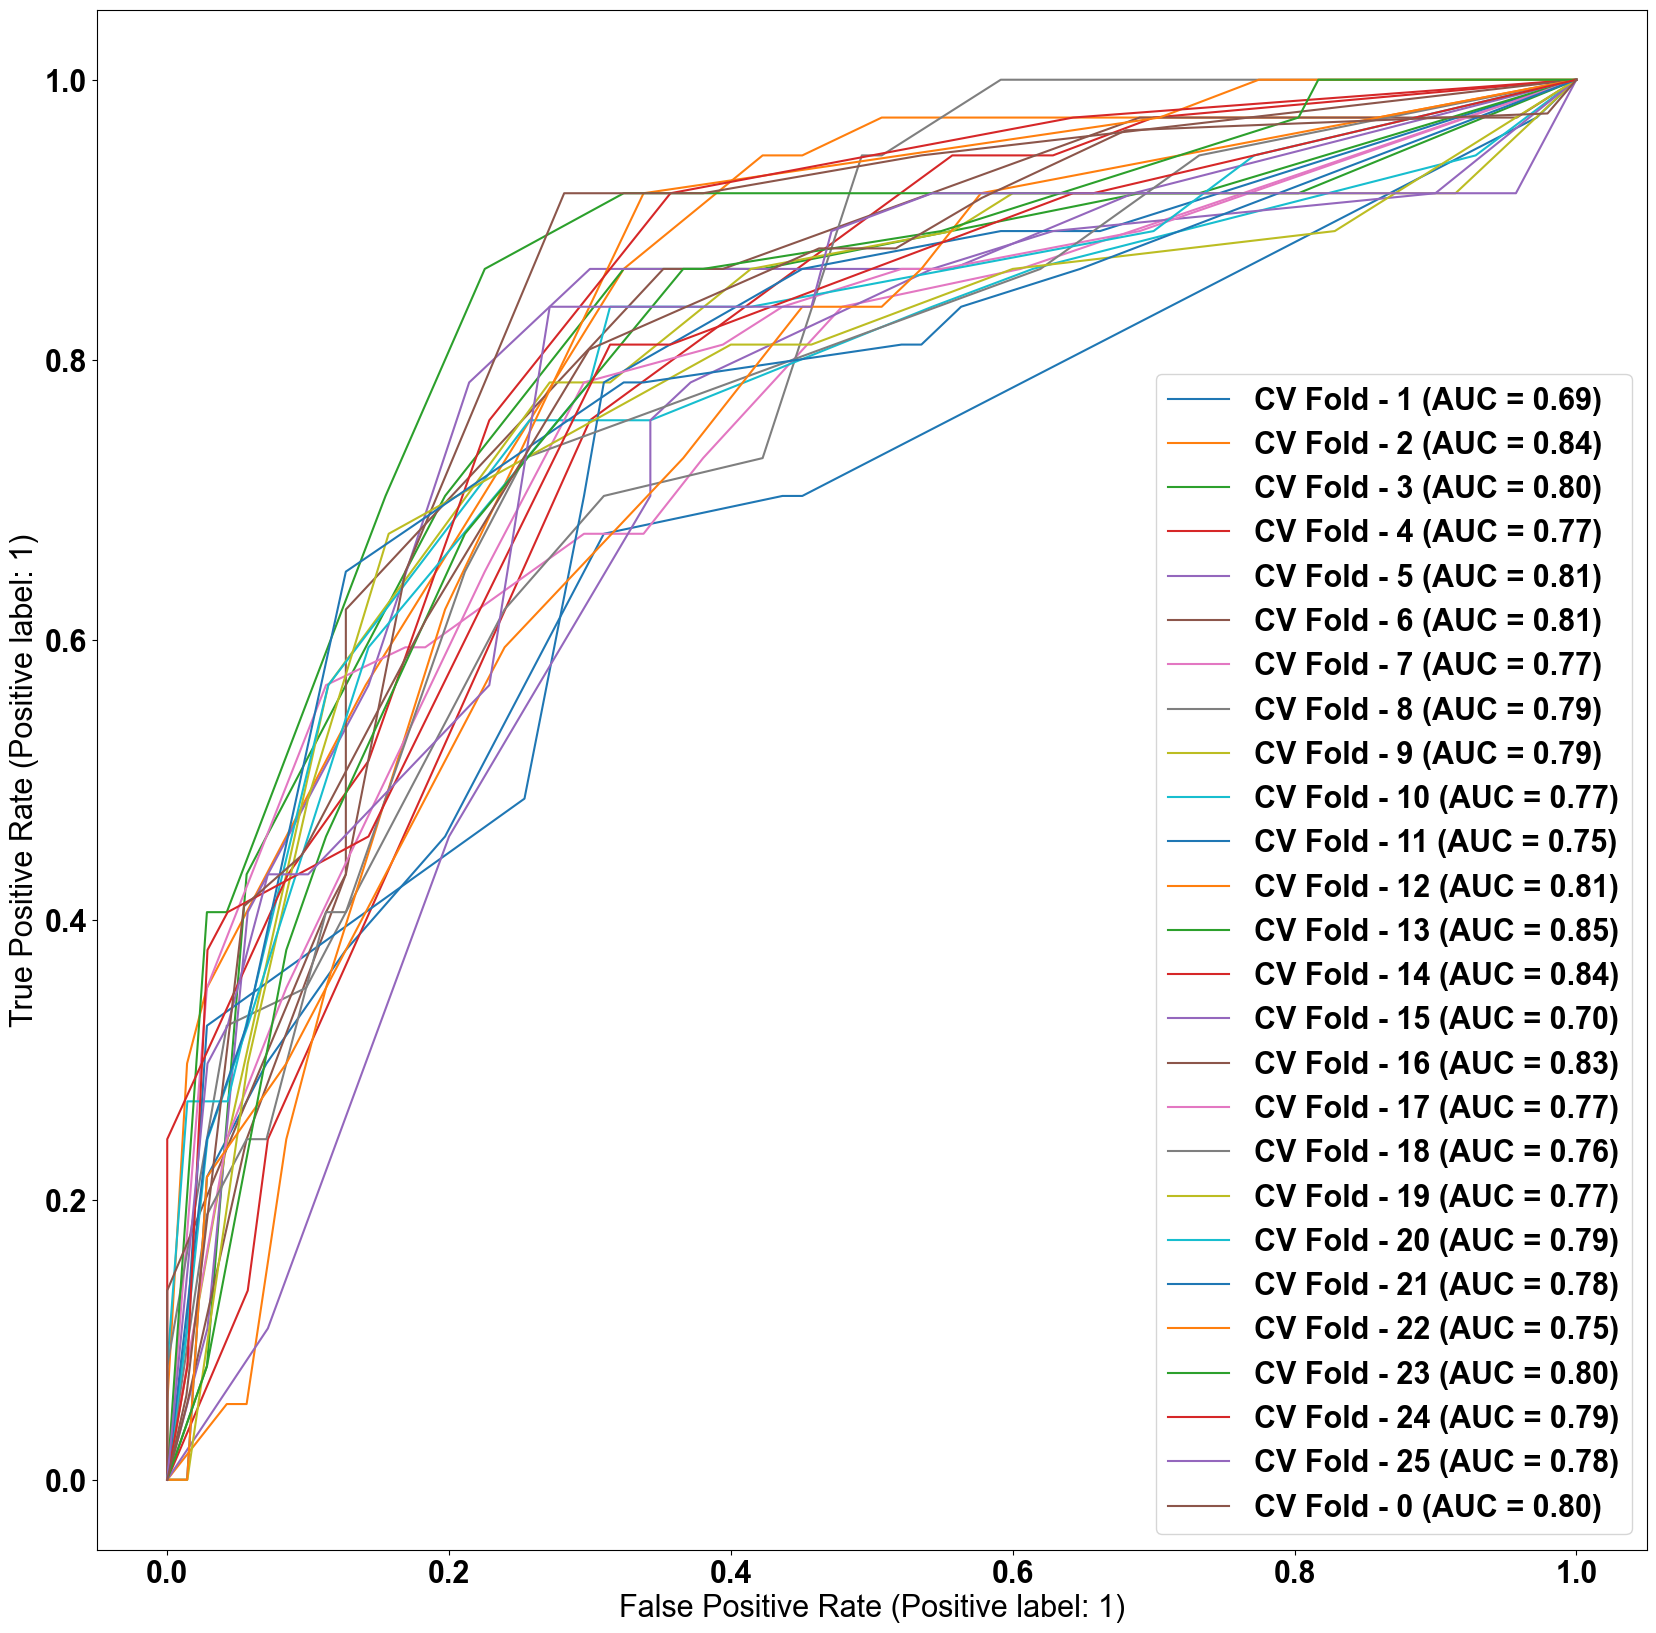

In [17]:
fig,ax=plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(20)
for val in collection_vals:
    label='CV Fold - %d'%(val['cv_fold'])
    rocDisplay = metrics.RocCurveDisplay.from_predictions(val['validation'],
                                                          val['model_probability'][:,1],
                                                          name=label,
                                                          ax=ax)
fig.savefig('Plots/ROC_Depth4_Entropy.svg',format='svg')

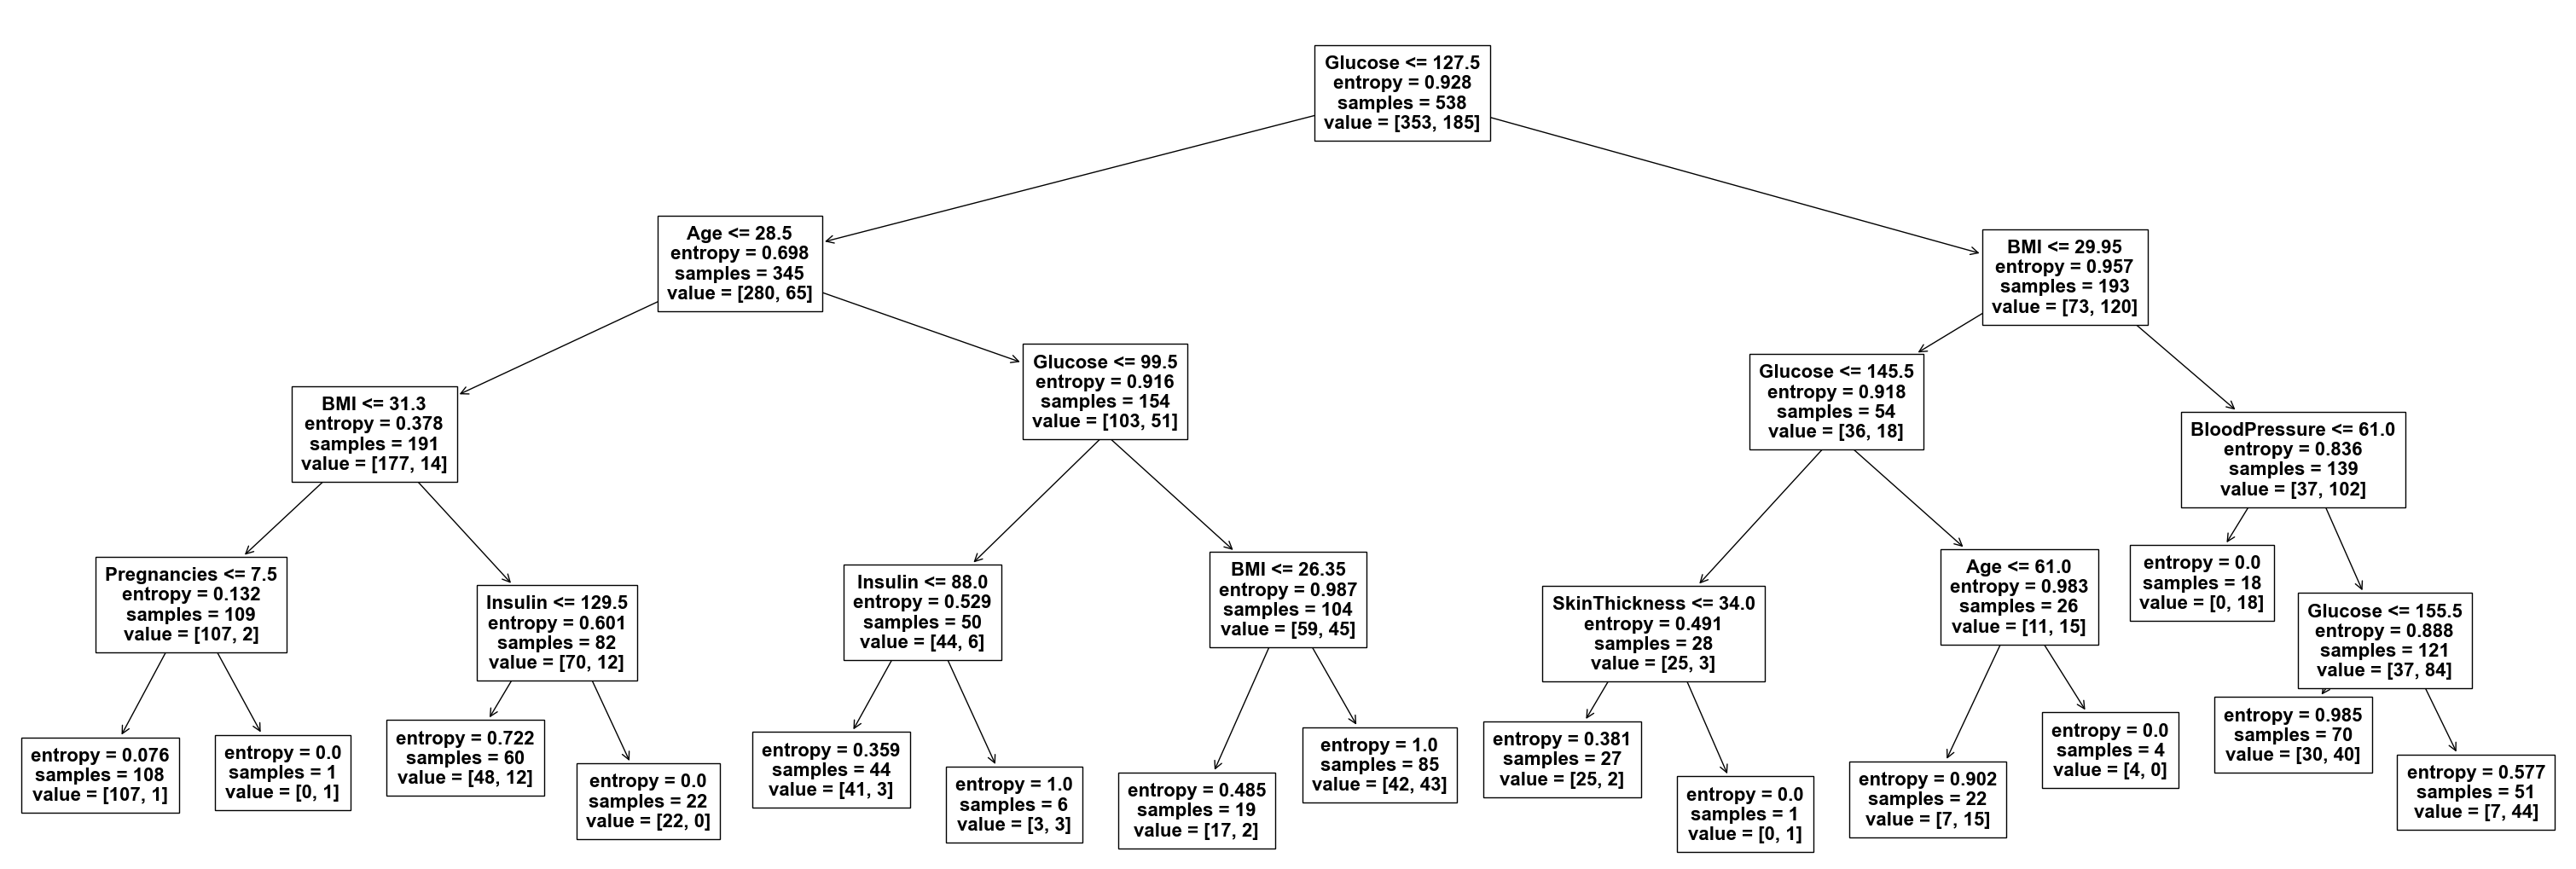

In [18]:
fig=plt.figure(figsize=[30,10])
ax=fig.add_axes([0,0,1,1])
txt=tree.plot_tree(entropy_depth4_tree,fontsize=8,proportion=False,ax=ax)
ycollect=[]
sign=1
for tx in txt:
    val = tx.get_text()
    num = re.search(r'x\[(\d+)\]',val) 
    if(num is not None): 
        num=int(num.group()[2:-1])
        tx.set_text(tx.get_text().replace(f'x[{num}]',training_data.columns[num]))
    cur_y=tx._y
    if(cur_y in ycollect):
        tx.set_y(cur_y+sign*np.random.rand()*0.05)
        sign=sign*-1
        ycollect.append(tx._y)
    else:
        ycollect.append(cur_y)
    tx.set_fontsize(16)
plt.savefig('Plots/Best_Depth4_Entropy_Metric_tree.svg',format='svg')
plt.show()

In [19]:
min_samples_leaf = 0.1313
criterion = 'entropy'
entropy_msl1313_tree = DecisionTreeClassifier(random_state=RANDOM_SEED,
                                              criterion=criterion,
                                              min_samples_leaf=min_samples_leaf)
scores,collection_vals = metric_statistics_decision_tree(entropy_msl1313_tree,training_features,training_class,test_features,test_class,num_cv=5,num_repeat=5)
scores.to_csv('Results/Performance_MSL1313_Entropy_Tree.csv',index=False)
score_summary=scores[['Accuracy','Recall','Precision','FPR','ROC_AUC']].describe().T
score_summary[['mean','std']].T

Accuracy     Recall  Precision        FPR    ROC_AUC
mean  73.332170  43.479949  70.128282  10.993802  66.243074
std    2.962174  12.711162  10.267470   7.357721   4.079930

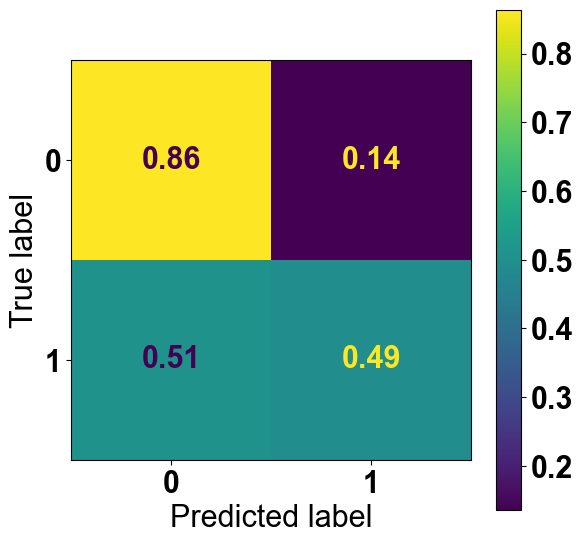

In [20]:
fig=plt.figure(figsize=[5,5])
ax = fig.add_axes([0,0,1,1])
metrics.ConfusionMatrixDisplay.from_predictions(test_class,collection_vals[-1]['model_prediction'],normalize='true',ax=ax)
plt.savefig('Plots/ConfusionMatrix_MSL1313_Entropy.svg',format='svg')

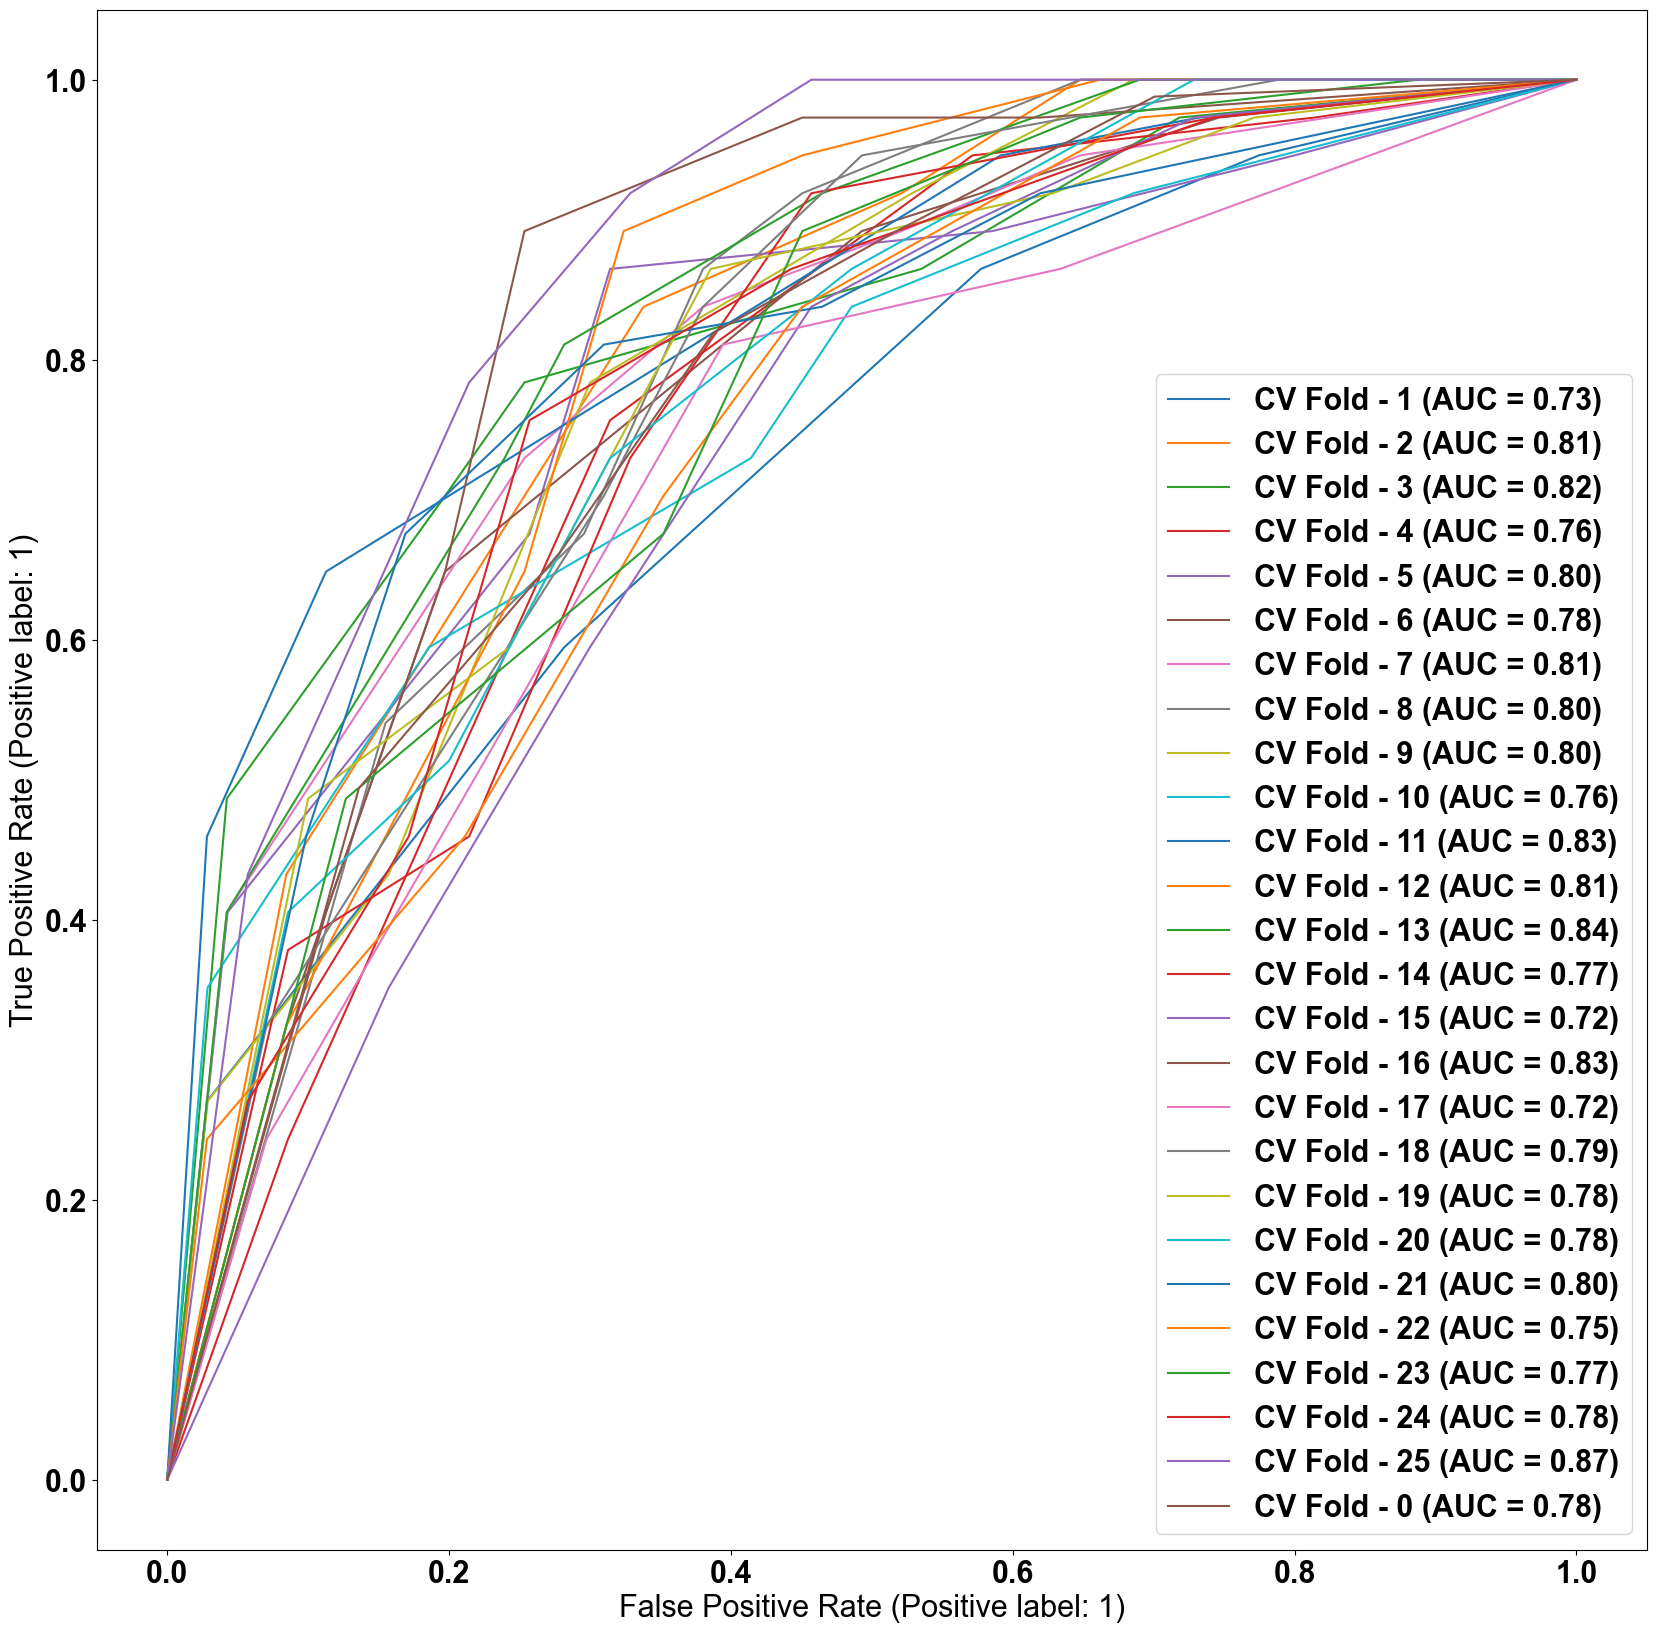

In [21]:
fig,ax=plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(20)
leg=[]
for val in collection_vals:
    label='CV Fold - %d'%(val['cv_fold'])
    rocDisplay = metrics.RocCurveDisplay.from_predictions(val['validation'],
                                                          val['model_probability'][:,1],
                                                          name=label,
                                                          ax=ax)
fig.savefig('Plots/ROC_MSL1313_Entropy.svg',format='svg')

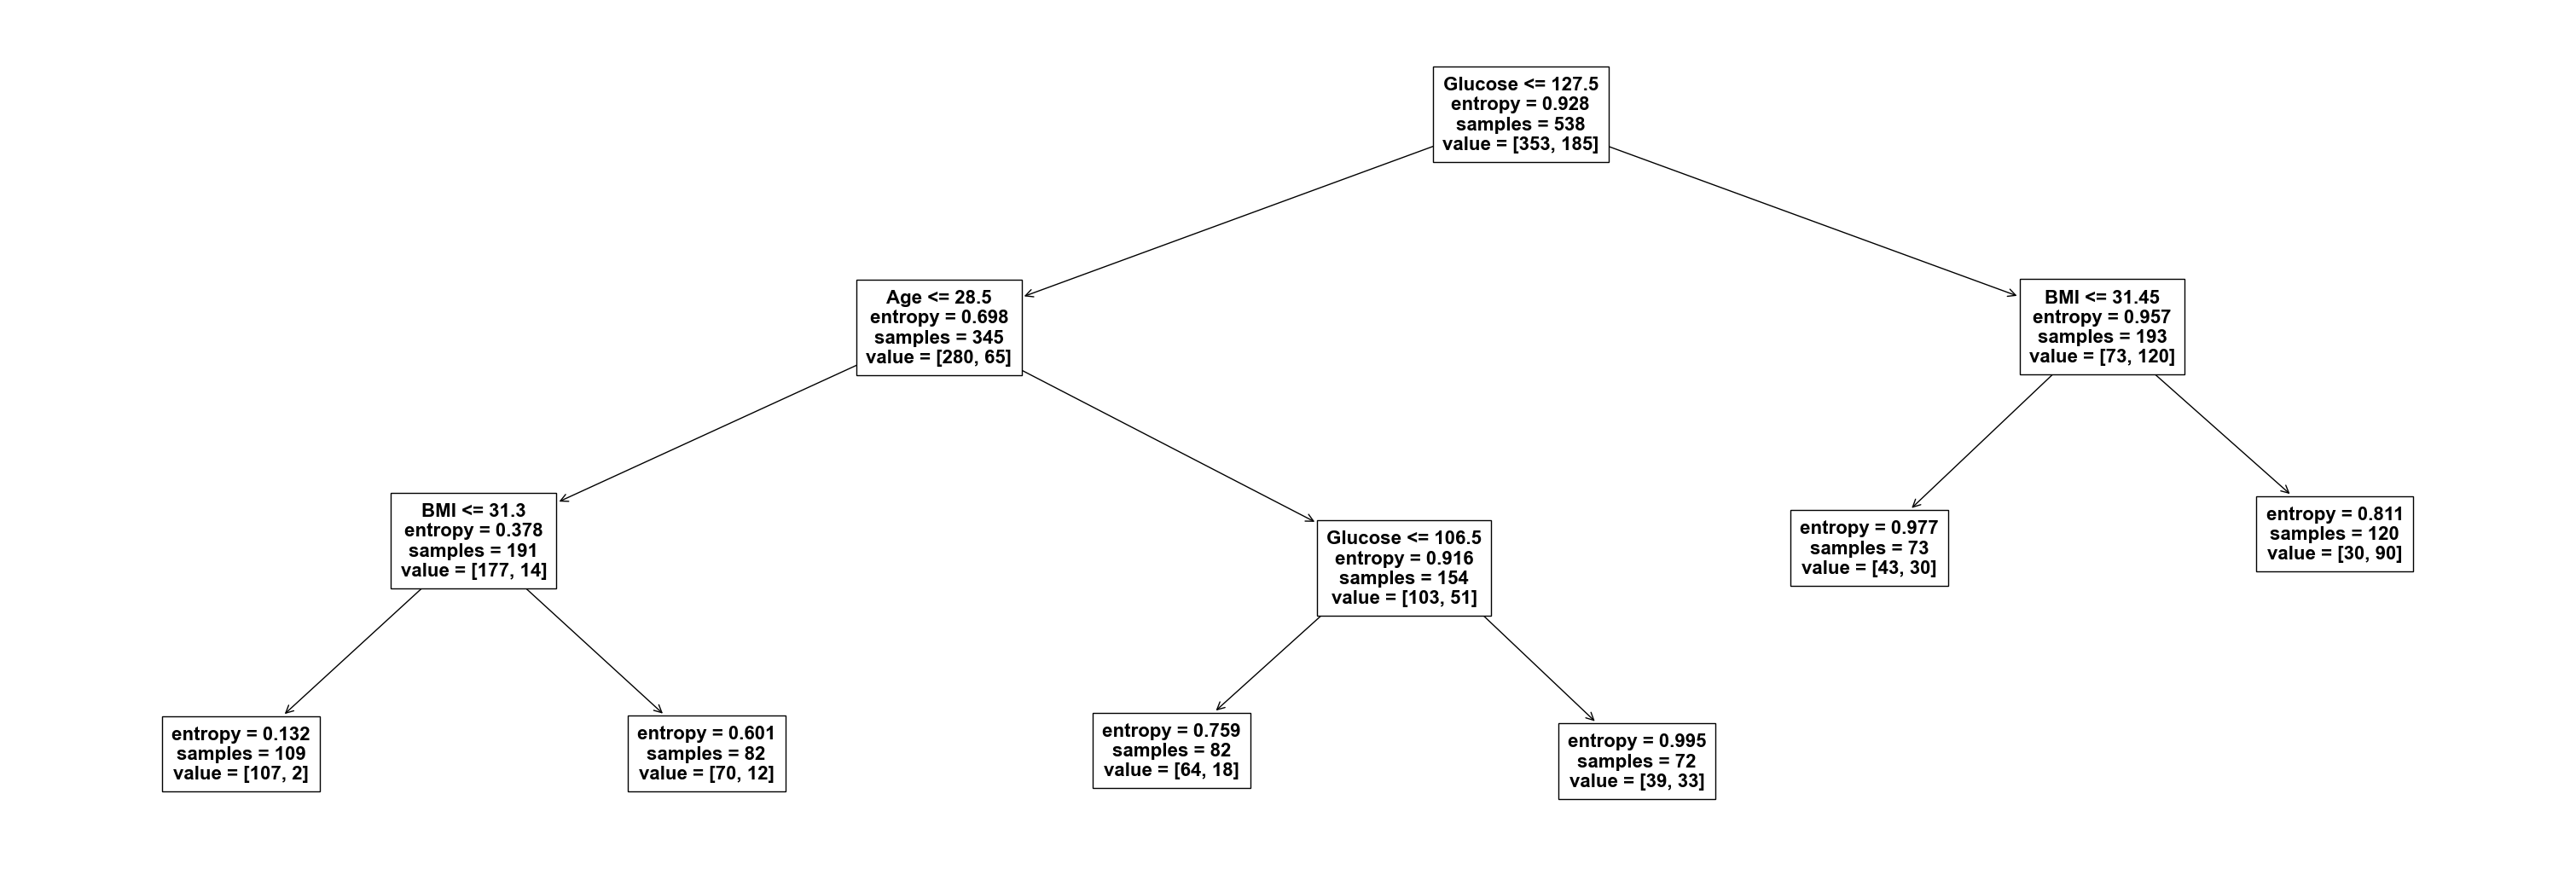

In [22]:
fig=plt.figure(figsize=[30,10])
ax=fig.add_axes([0,0,1,1])
txt=tree.plot_tree(entropy_msl1313_tree,fontsize=8,proportion=False,ax=ax)
ycollect=[]
sign=1
for tx in txt:
    val = tx.get_text()
    num = re.search(r'x\[(\d+)\]',val) 
    if(num is not None): 
        num=int(num.group()[2:-1])
        tx.set_text(tx.get_text().replace(f'x[{num}]',training_data.columns[num]))
    cur_y=tx._y
    if(cur_y in ycollect):
        tx.set_y(cur_y+sign*np.random.rand()*0.05)
        sign=sign*-1
        ycollect.append(tx._y)
    else:
        ycollect.append(cur_y)
    tx.set_fontsize(16)
plt.savefig('Plots/Best_MSL1313_Entropy_Metric_tree.svg',format='svg')
plt.show()

In [23]:
min_samples_leaf = 0.3022
criterion = 'entropy'
entropy_msl3022_tree = DecisionTreeClassifier(random_state=RANDOM_SEED,
                                              criterion=criterion,
                                              min_samples_leaf=min_samples_leaf)

scores,collection_vals = metric_statistics_decision_tree(entropy_msl3022_tree,training_features,training_class,test_features,test_class,num_cv=5,num_repeat=5)
scores.to_csv('Results/Performance_MSL3022_Entropy_Tree.csv',index=False)
score_summary=scores[['Accuracy','Recall','Precision','FPR','ROC_AUC']].describe().T
score_summary[['mean','std']].T

Accuracy     Recall  Precision        FPR    ROC_AUC
mean  73.392169  64.560529  60.922209  21.968846  71.295841
std    3.712284   8.174066   5.540891   4.750484   4.249424

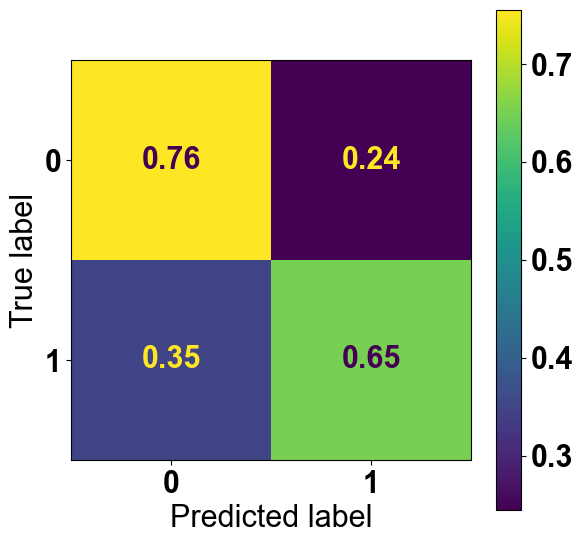

In [24]:
fig=plt.figure(figsize=[5,5])
ax = fig.add_axes([0,0,1,1])
metrics.ConfusionMatrixDisplay.from_predictions(test_class,collection_vals[-1]['model_prediction'],normalize='true',ax=ax)
plt.savefig('Plots/ConfusionMatrix_MSL3022_Entropy.svg',format='svg')

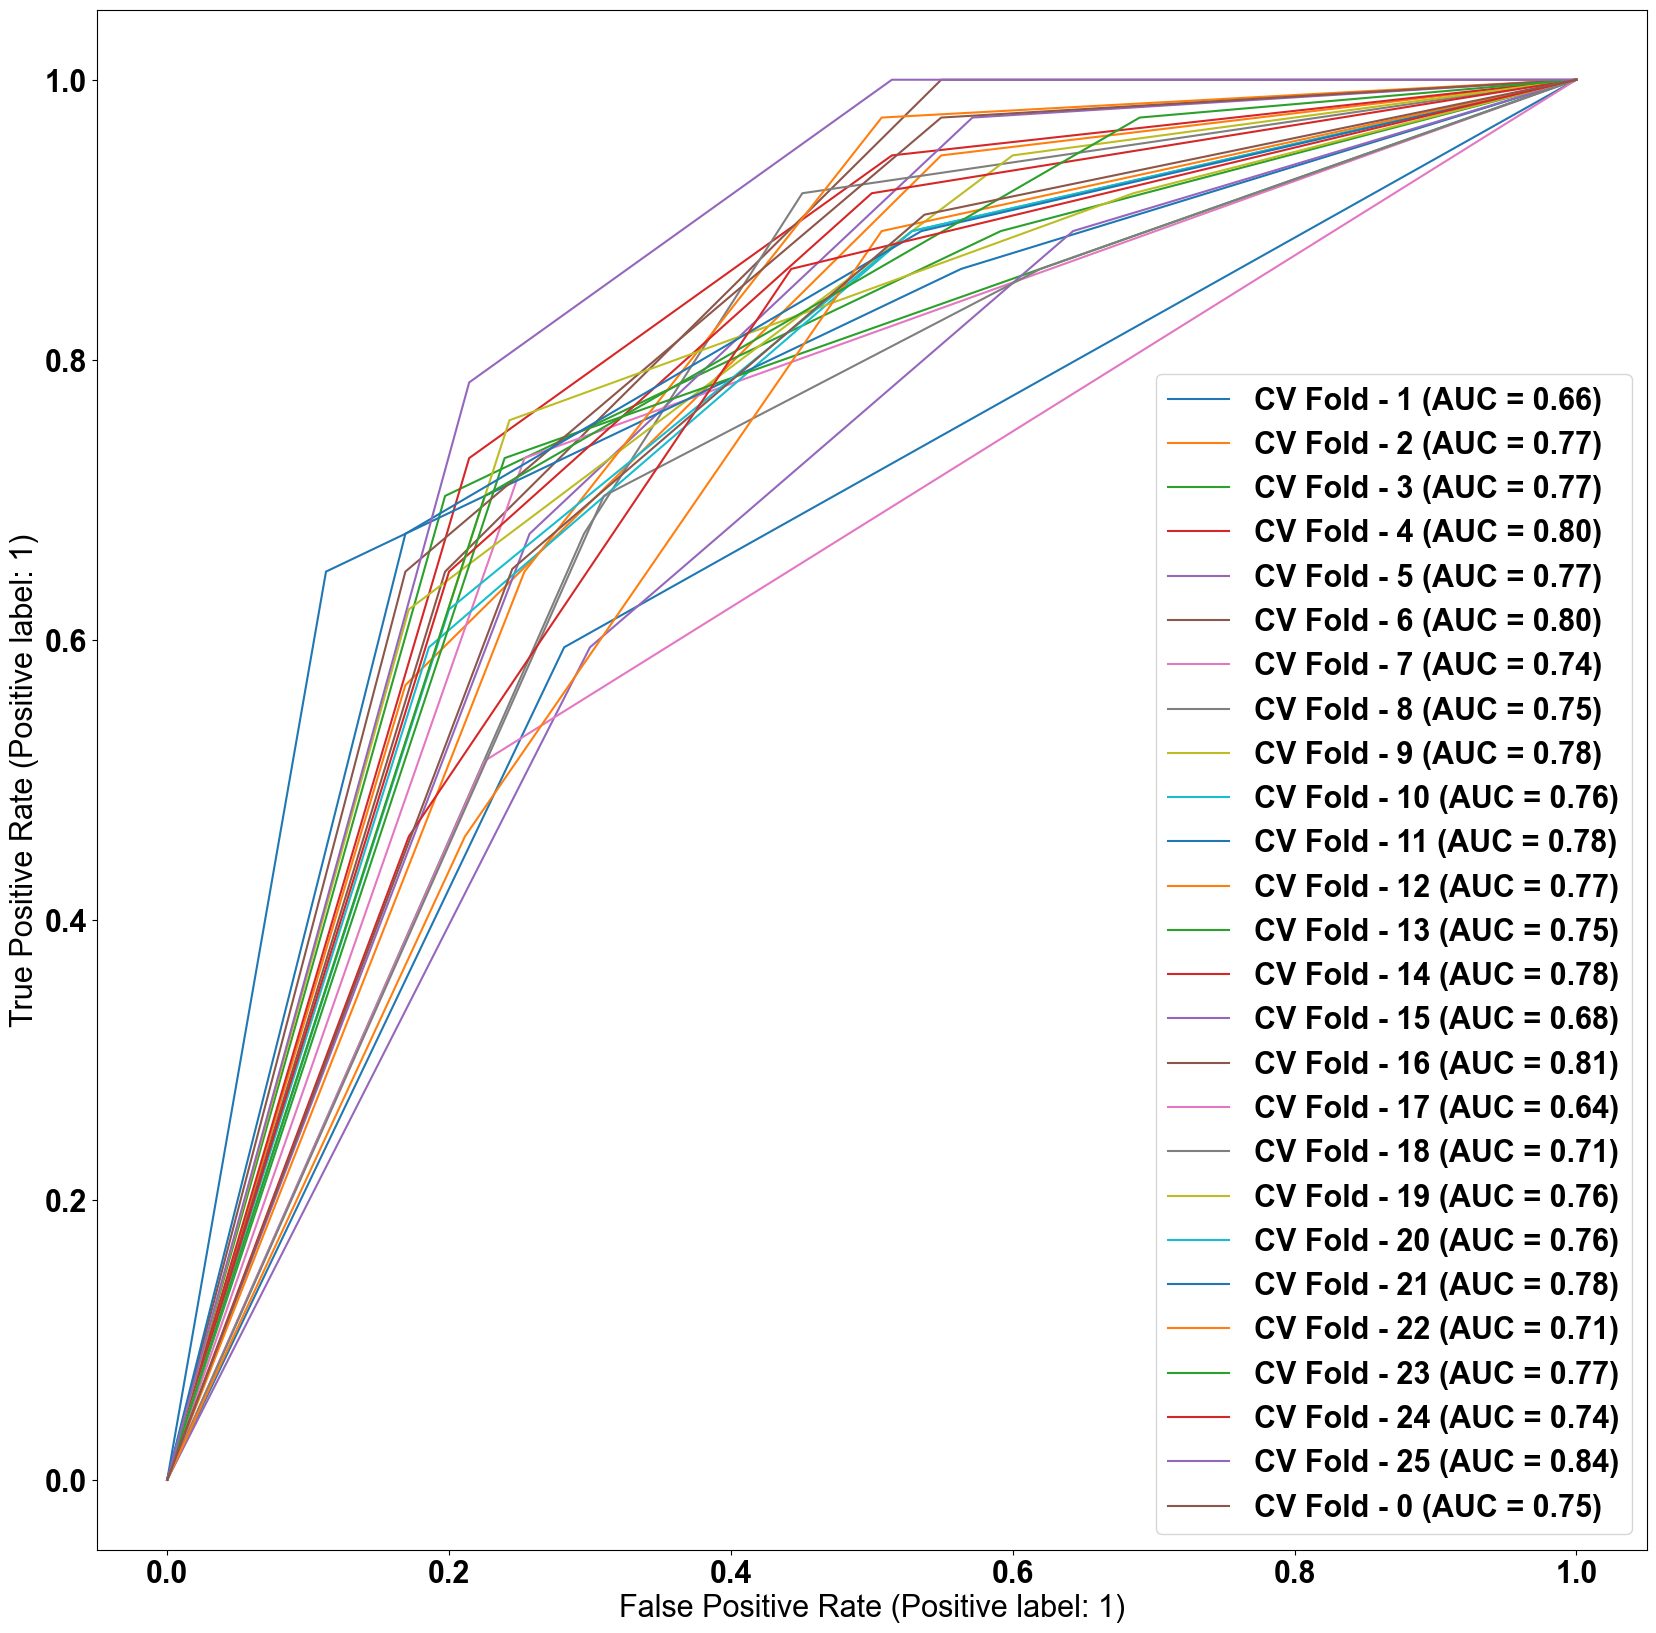

In [26]:
fig,ax=plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(20)
leg=[]
for val in collection_vals:
    label='CV Fold - %d'%(val['cv_fold'])
    rocDisplay = metrics.RocCurveDisplay.from_predictions(val['validation'],
                                                          val['model_probability'][:,1],
                                                          name=label,
                                                          ax=ax)
fig.savefig('Plots/ROC_MSL3022_Entropy.svg',format='svg')

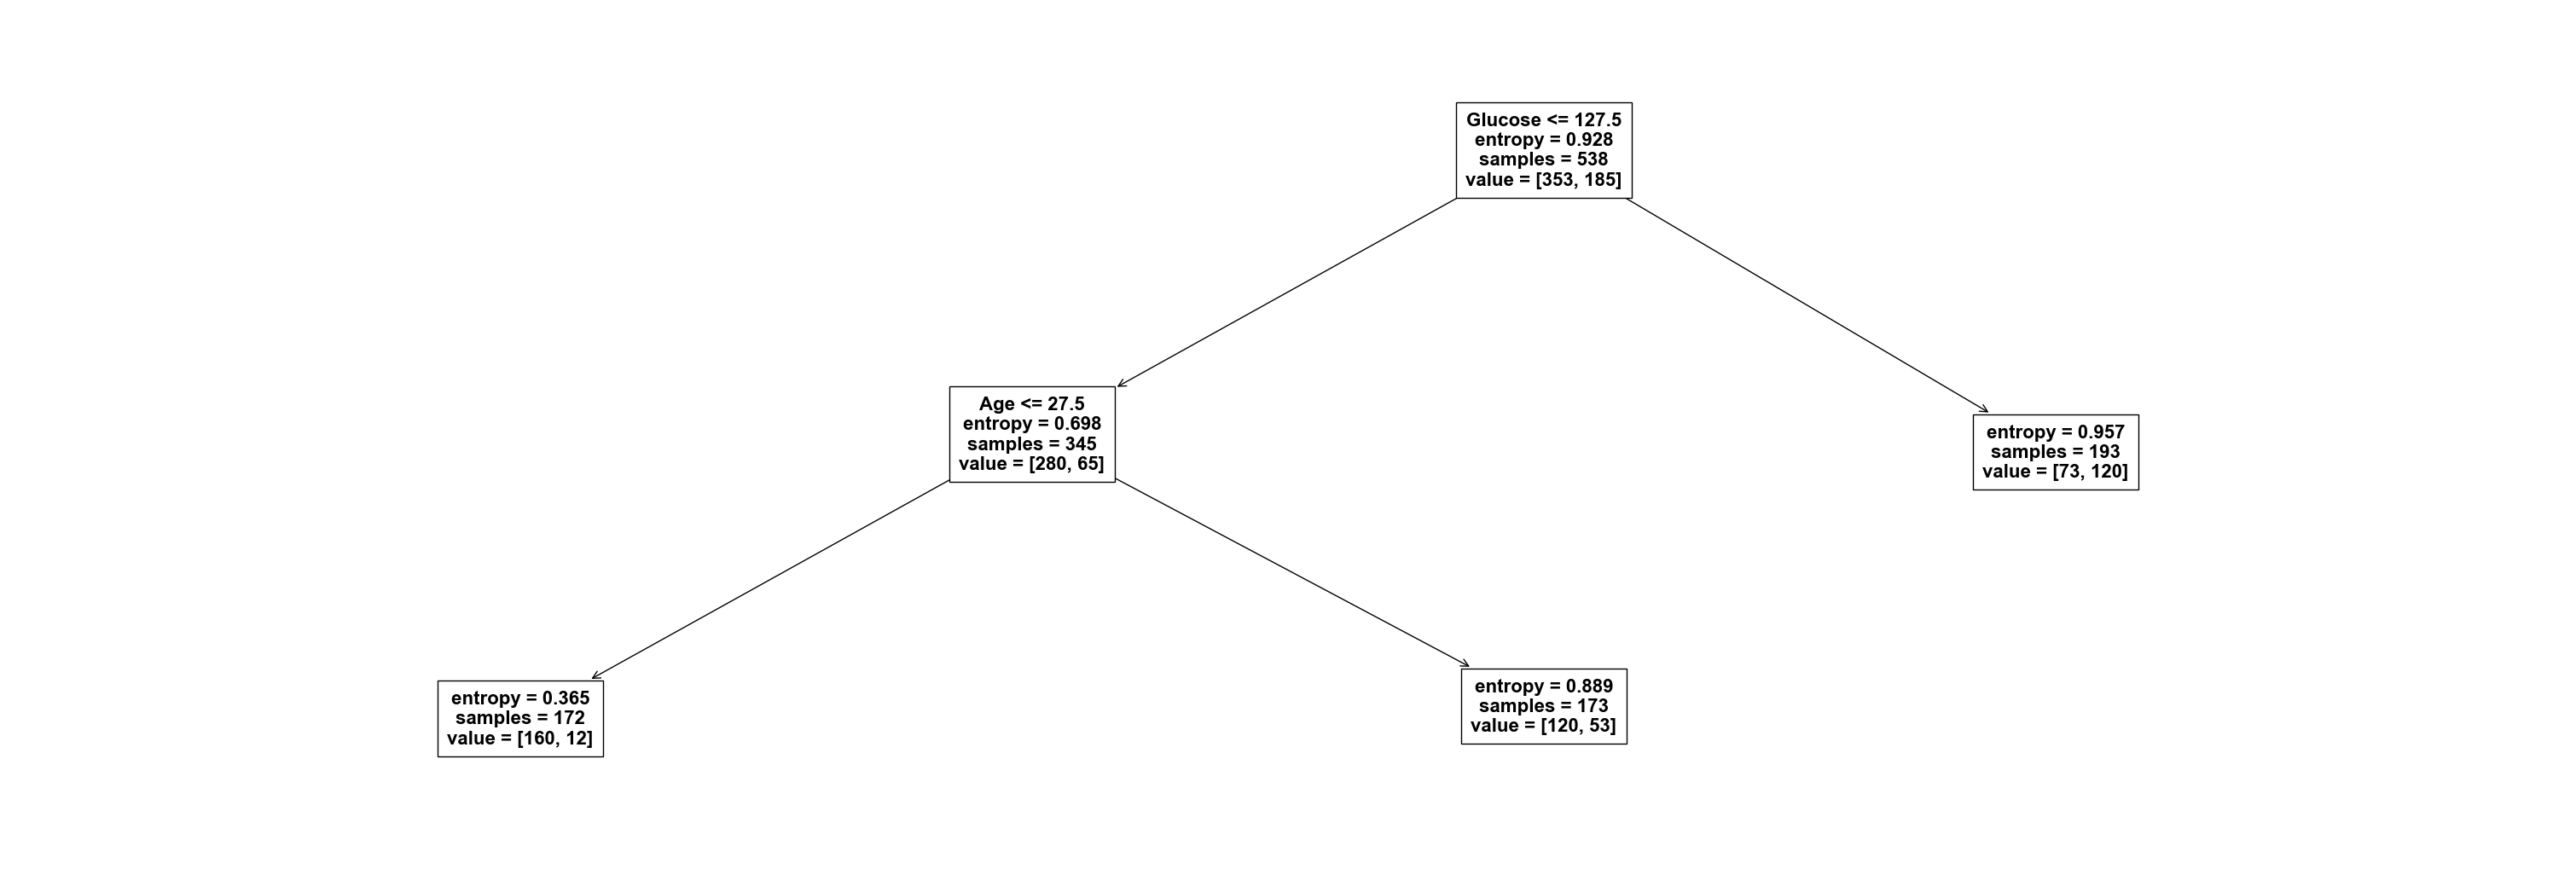

In [27]:
fig=plt.figure(figsize=[30,10])
ax=fig.add_axes([0,0,1,1])
txt=tree.plot_tree(entropy_msl3022_tree,fontsize=8,proportion=False,ax=ax)
ycollect=[]
sign=1
for tx in txt:
    val = tx.get_text()
    num = re.search(r'x\[(\d+)\]',val) 
    if(num is not None): 
        num=int(num.group()[2:-1])
        tx.set_text(tx.get_text().replace(f'x[{num}]',training_data.columns[num]))
    cur_y=tx._y
    if(cur_y in ycollect):
        tx.set_y(cur_y+sign*np.random.rand()*0.05)
        sign=sign*-1
        ycollect.append(tx._y)
    else:
        ycollect.append(cur_y)
    tx.set_fontsize(16)
plt.savefig('Plots/Best_MSL3022_Entropy_Metric_tree.svg',format='svg')
plt.show()

In [28]:
criterion = 'entropy'
collect = []
for min_samples_leaf in np.linspace(0.001,0.4,50): 
    
    dtree = DecisionTreeClassifier(random_state=RANDOM_SEED,
                                   criterion=criterion,
                                   min_samples_leaf=min_samples_leaf)
    df,_ = metric_statistics_decision_tree(dtree,training_features,training_class,test_features,test_class)
    df['MSL'] = min_samples_leaf
    collect.append(df)

scores_msl=pd.concat(collect)

collect = []
for depth in range(1,20):
    
    dtree = DecisionTreeClassifier(random_state=RANDOM_SEED,
                                   criterion=criterion,
                                   max_depth=depth)
    df,_ = metric_statistics_decision_tree(dtree,training_features,training_class,test_features,test_class)
    df['Depth'] = depth
    collect.append(df)

scores_depth=pd.concat(collect)


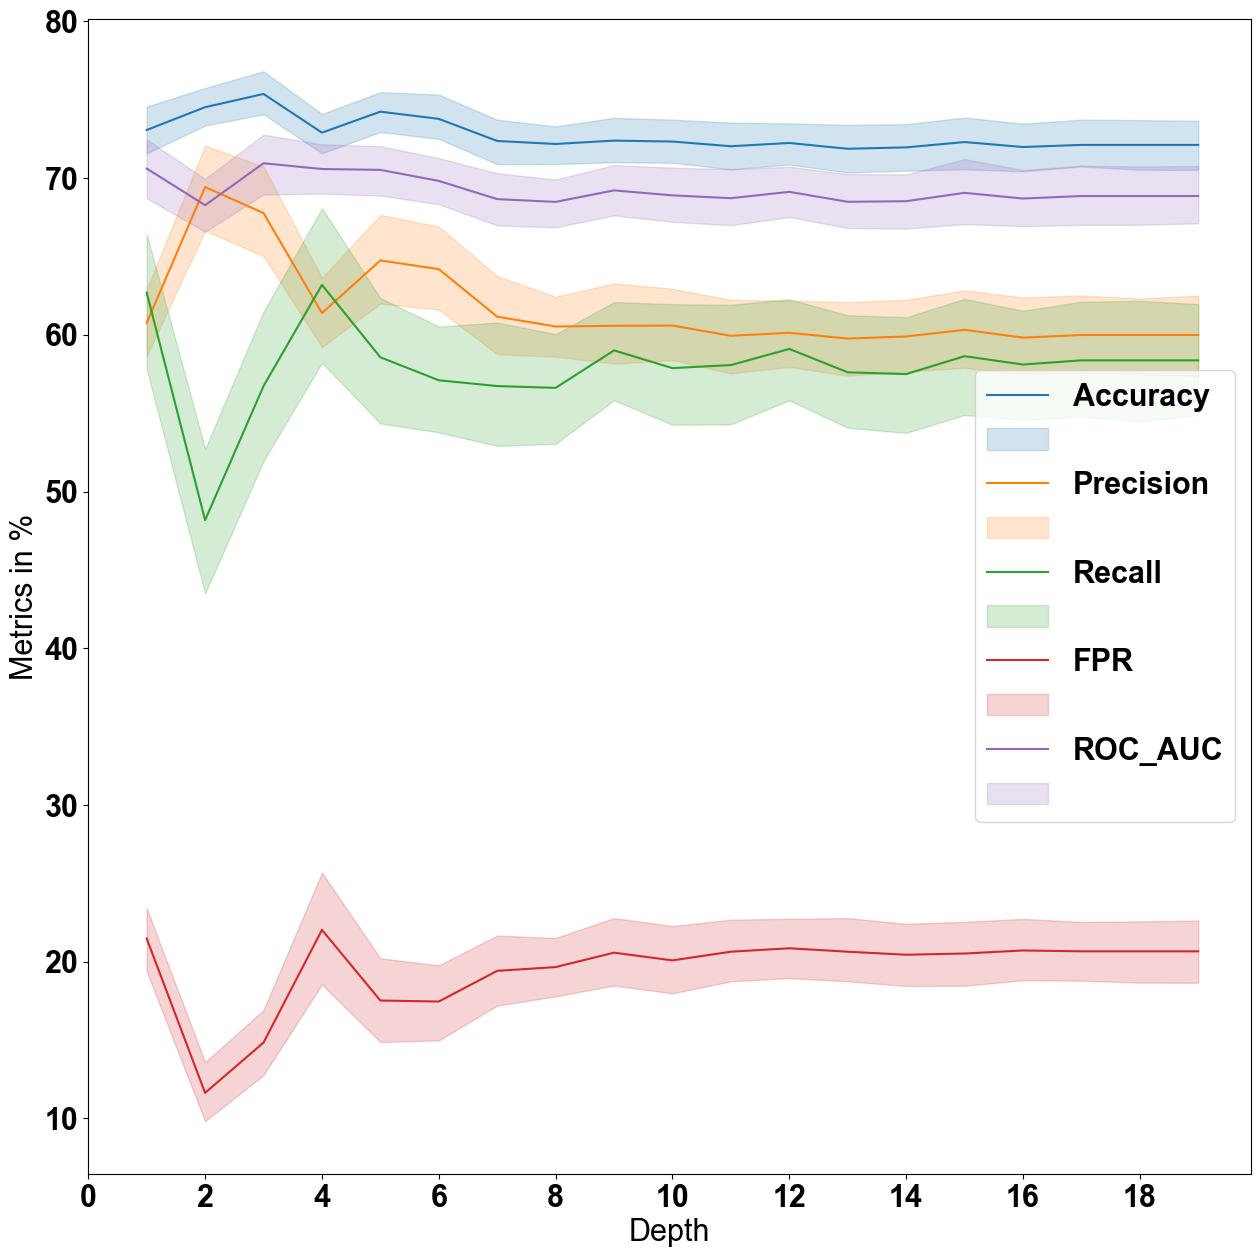

In [39]:
fig = plt.figure(figsize=[15,15])
sns.lineplot(data=scores_depth,x='Depth',y='Accuracy')
sns.lineplot(data=scores_depth,x='Depth',y='Precision')
sns.lineplot(data=scores_depth,x='Depth',y='Recall')
sns.lineplot(data=scores_depth,x='Depth',y='FPR')
sns.lineplot(data=scores_depth,x='Depth',y='ROC_AUC')
plt.legend(['Accuracy','','Precision','','Recall','','FPR','','ROC_AUC',''])
plt.ylabel('Metrics in %')
plt.xticks(range(0,20,2))
plt.show()
plt.close()

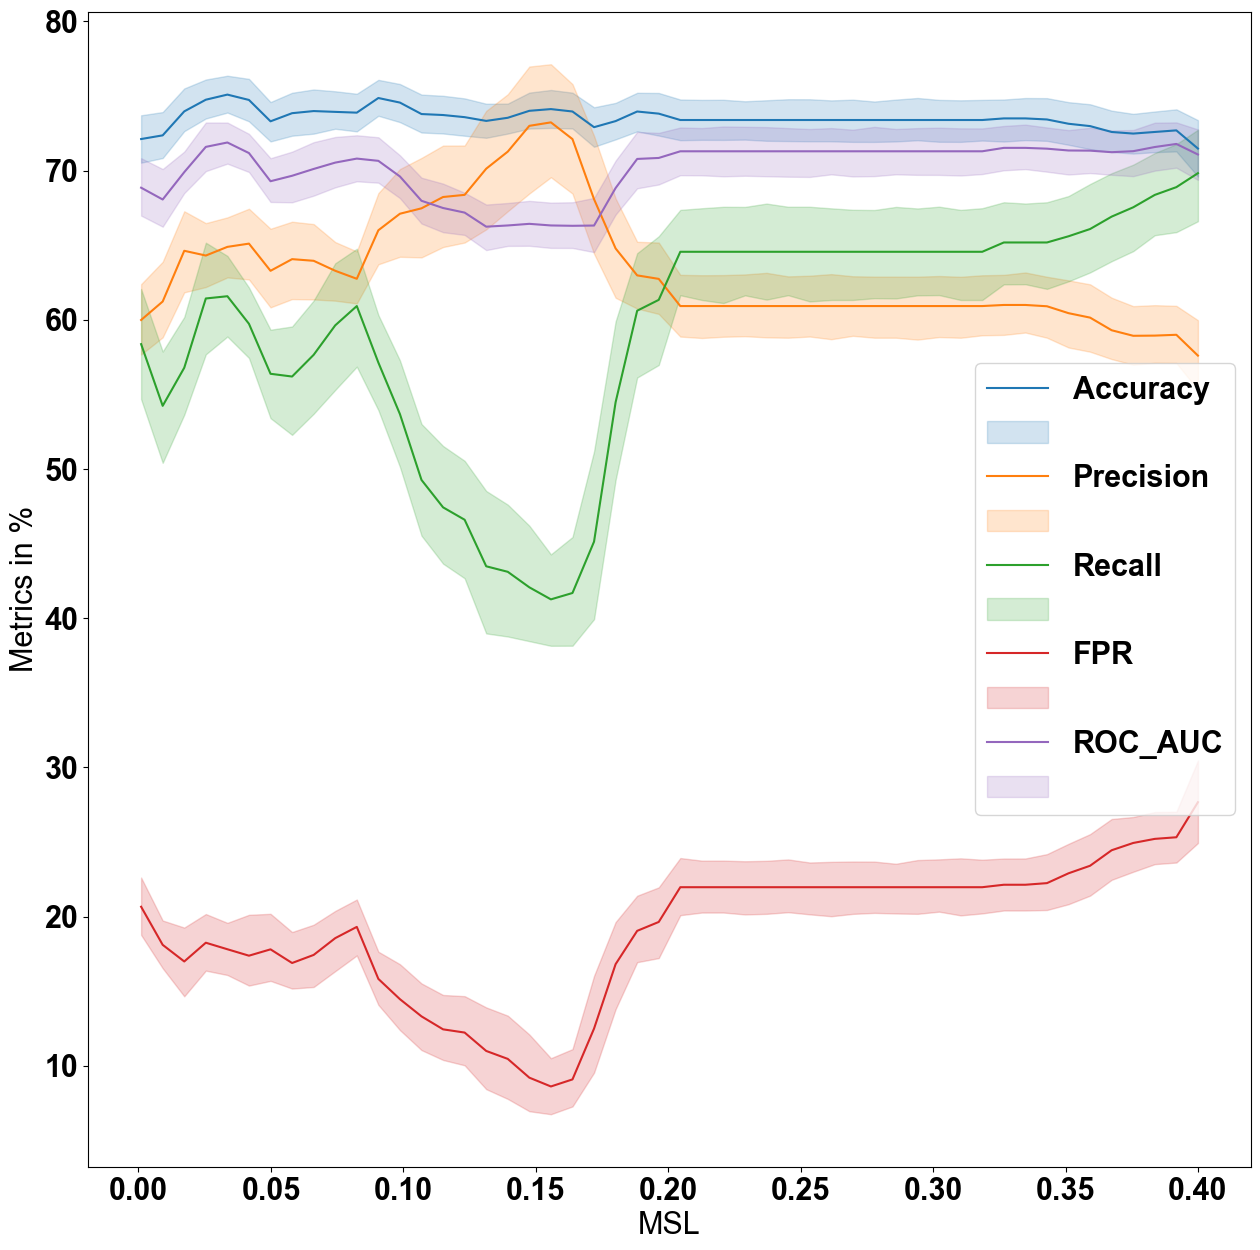

In [42]:
fig = plt.figure(figsize=[15,15])
sns.lineplot(data=scores_msl,x='MSL',y='Accuracy')
sns.lineplot(data=scores_msl,x='MSL',y='Precision')
sns.lineplot(data=scores_msl,x='MSL',y='Recall')
sns.lineplot(data=scores_msl,x='MSL',y='FPR')
sns.lineplot(data=scores_msl,x='MSL',y='ROC_AUC')
plt.legend(['Accuracy','','Precision','','Recall','','FPR','','ROC_AUC',''])
plt.ylabel('Metrics in %')
plt.show()
plt.close()